# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [124]:
def find_sum(a,d,N):
    sum = 0
    for n in range(N):
        sum += a
        a += d
    return sum
    ## Your code here

Check yourself

In [125]:
a = 2
d = 3
N = 15
assert find_sum(a,d,N) == 345, 'Wrong answer'

---
**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [126]:
import math

def check_prime(N):
    for i in range(2, int(math.sqrt(N) + 1)):
        if (N % i == 0):
            return False
    return True

Check yourself

In [127]:
inp = [3, 8, 13, 111, 113, 237, 307, 479, 481]
answer = [True, False, True, False, True, False, True, True, False]

for N, ans in zip(inp, answer):
    assert check_prime(N) == ans, f'Wrong answer for input {N}, {ans} is expected'

---
**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the previous task).

In [128]:
def find_primes(N):
    ## Your code here
    cnt = 0
    primes = []

    num = 2
    while cnt != N:
        if check_prime(num):
            primes.append(num)
            cnt += 1
        num += 1

    return primes

Check yourself

In [129]:
assert find_primes(5) == [2, 3, 5, 7, 11], 'Wrong answer'

---
**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` or any other functions, find the maximum number.

In [130]:
def find_max(a, b, c):
    ## Your code here
    if a > b: 
        if a > c:
            return a
        else:
            return c
    else: 
        if b > c:
            return b
        else:
            return c

Check yourself

In [131]:
from random import randint
for i in range(10):    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    answer = np.max([a, b, c])  # You cannot use `np.max` in the solution ;)
    print(f'Checking on {a, b, c}')
    assert find_max(a, b, c) == answer, f'Wrong maximum, {answer} is expected'

Checking on (-86, 48, -14)
Checking on (-42, 52, -90)
Checking on (-100, 15, -6)
Checking on (41, 64, 6)
Checking on (68, -37, -64)
Checking on (-38, 50, -73)
Checking on (14, 91, -54)
Checking on (-24, 5, 2)
Checking on (17, 21, 56)
Checking on (2, -57, 5)


# 2. Numpy (4 points)
### **!Do not use loops in the tasks below, see disclamer at the top of the notebook**

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 20 and with sum of its elements equals to 3.

In [132]:
my_array = list(np.random.rand(1, 20)[0])
my_array[19] = 3 - sum(my_array[:19])

Check yourself

In [133]:
assert len(my_array) == 20
assert np.allclose(np.sum(my_array), 3)

---
**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special functions. You may only use basic numpy operations (first level functions like `np.dot` are ok, higher level functions like `np.linalg.*` are prohibited).**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}, \,\, \text{where}\,\, ||a||_2 = \sqrt{\sum_i a_i^2} $$

In [134]:
def cal_euclidean(a, b):
    ## Your code here
    return np.sqrt(np.sum(np.square(a - b)))
    
def cal_manhattan(a, b):  
    ## Your code here
    return np.sum(np.abs(a - b))

def cal_cosine(a, b):    
    ## Your code here
    return 1 - np.transpose(a).dot(b) / (np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b))))

Check yourself

In [135]:
a = np.ones(10)*0.1
b = np.ones(10)

assert np.allclose(cal_euclidean(a, b), 2.846049)
assert np.allclose(cal_manhattan(a, b), 9)
assert np.allclose(cal_cosine(a, b), 0)

---
**Task 3** (0.5 points) <br/>
Create a function `custom_scaler`, which takes as input an array with integer values and transforms an array, so that:
* Maximum element(s) value is 2 (it **doesn't** mean `a[max_index] = 2`)
* Minimum element(s) value is -2 (it **doesn't** mean `a[min_index] = -2`)
* Other values are in the interval [-2, 2] (using **arithmetic** transformations)

In [136]:
def custom_scaler(my_array):
    ## Your code here
    max = np.max(my_array)
    min = np.min(my_array)
    return ((my_array - min) / (max - min) * 2 - 1) * 2 

Check yourself

In [137]:
test_array = np.random.randint(-100, 100, size=4)
result = custom_scaler(test_array)
print(test_array, '->>', result)

assert np.allclose(np.max(result), 2), f'Maximum value shoul be 2, got {np.max(result)} instead'
assert np.allclose(np.min(result), -2), f'Minimum value should be -2, got {np.min(result)} instead'
assert np.sum(result < -2) + np.sum(result > 2) == 0, 'All elements are supposed to be between -2 and 2'

[-28  -5 -28 -61] ->> [ 0.35714286  2.          0.35714286 -2.        ]


---
**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Select a column which contains the maximum element of the array.

In [138]:
my_array = np.random.randint(low = 0, high = 51, size = (5, 6))
selected_column = my_array[:, np.where(my_array == np.amax(my_array))[0]]

In [139]:
print(f'Array:\n {my_array}')
print(f'Shape: {my_array.shape}')
print(f'Selected column {selected_column}')

Array:
 [[34 12 25 43  4 43]
 [45 50 17 27  3 16]
 [48 12  8 14 38 41]
 [ 5 14 20 33  0 17]
 [39 29 24 35 20  1]]
Shape: (5, 6)
Selected column [[12]
 [50]
 [12]
 [14]
 [29]]


---
**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [140]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print(f'Given array: {np.array2string(arr, precision=2)}')

Given array: [ nan 0.61 0.01  nan  nan 0.21 0.5  0.18 0.38  nan]


In [141]:
arr[np.isnan(arr)] = np.nanmean(arr) 

print(f'Result: {np.array2string(arr, precision=2)}')

Result: [0.31 0.61 0.01 0.31 0.31 0.21 0.5  0.18 0.38 0.31]


---
**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for each of 3 channels (a vector of shape 3).

In [142]:
def mean_channel(X):
    x = X[::,0]
    y = X[::,1]
    z = X[::,2]
    return np.mean(x), np.mean(y), np.mean(z)

In [143]:
n = 28
m = 16
X =  np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

(-0.5833333333333334, 0.11904761904761904, -0.07142857142857142)

---
**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [144]:
def get_unique_rows(X):
    return np.unique(X, axis = 0)

In [145]:
X =  np.random.randint(4, 6, size=(n, 2, 2))
print(X)

[[[5 5]
  [5 5]]

 [[5 4]
  [4 5]]

 [[4 5]
  [4 4]]

 [[4 5]
  [5 5]]

 [[4 5]
  [4 4]]

 [[4 4]
  [5 5]]

 [[5 5]
  [5 4]]

 [[5 5]
  [4 5]]

 [[4 5]
  [5 4]]

 [[4 5]
  [5 5]]

 [[4 5]
  [5 5]]

 [[4 4]
  [5 4]]

 [[5 4]
  [5 5]]

 [[4 4]
  [4 5]]

 [[5 4]
  [4 4]]

 [[5 4]
  [4 4]]

 [[5 5]
  [4 5]]

 [[4 5]
  [5 5]]

 [[5 5]
  [5 5]]

 [[5 4]
  [5 4]]

 [[5 5]
  [4 5]]

 [[5 5]
  [5 5]]

 [[4 5]
  [5 5]]

 [[4 5]
  [5 4]]

 [[4 4]
  [4 4]]

 [[5 5]
  [4 4]]

 [[5 5]
  [5 5]]

 [[5 5]
  [5 5]]]


In [146]:
get_unique_rows(X)

array([[[4, 4],
        [4, 4]],

       [[4, 4],
        [4, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 4],
        [5, 5]],

       [[4, 5],
        [4, 4]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [4, 5]],

       [[5, 4],
        [5, 4]],

       [[5, 4],
        [5, 5]],

       [[5, 5],
        [4, 4]],

       [[5, 5],
        [4, 5]],

       [[5, 5],
        [5, 4]],

       [[5, 5],
        [5, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset

In [147]:
dataset =  pd.read_csv("titanic.csv")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---
**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In which columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What was the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [148]:
## Your code here

miss = dataset.isnull().sum().sort_values()
miss = miss[miss != 0]

print("Columns with missing values")
for a, b in miss.items():
    print(a)

Columns with missing values
Embarked
Age
Cabin


In [149]:
print("Unique classes: ", len(dataset["Pclass"].unique()))

Unique classes:  3


In [150]:

survivors = dataset["Survived"]
survivors = survivors[survivors == 1]

print("Percentage of survivors {}".format(len(survivors) / len(dataset["Survived"])*100))

Percentage of survivors 38.38383838383838


In [151]:
dataset.groupby('Pclass').Survived.mean()
# Survival rate is not balanced

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [152]:
print("Average ticket fare: ", dataset["Fare"].mean())

Average ticket fare:  32.2042079685746


In [153]:
print("The most popular of embarkation is Southhampton")
dataset["Embarked"].value_counts()

The most popular of embarkation is Southhampton


S    644
C    168
Q     77
Name: Embarked, dtype: int64

---
**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column `Name`, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [154]:
## Your code here
test = dataset.copy()

titles = test["Name"].apply(lambda n: n.split(',')[1].split('.')[0].strip())

display(titles)

print("{} Unique titles".format(len(titles.unique())))

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

17 Unique titles


In [155]:
cnt = titles
cnt = cnt.groupby(cnt)
cnt.count()

Name
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Name, dtype: int64

In [156]:
namesex = dataset[["Name", "Sex"]]
namesex["Name"] = namesex["Name"].apply(lambda n: n.split(',')[1].split('.')[0].strip())

sigma_males = namesex[namesex["Sex"] == "male"]
print(f"Most popular title among males: {sigma_males.mode()['Name'].to_string(index=False)}")

women = namesex[namesex["Sex"] == "female"]
print(f"Most popular title among females: {women.mode()['Name'].to_string(index=False)}")

Most popular title among males:  Mr
Most popular title among females:  Miss


<ipython-input-156-300f6b38c83d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  namesex["Name"] = namesex["Name"].apply(lambda n: n.split(',')[1].split('.')[0].strip())


---
**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

Minimum age:  0.42
Maximum age:  80.0


<AxesSubplot:>

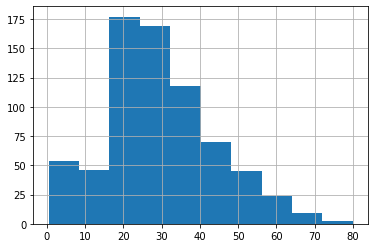

In [157]:
## Your code here

ages = dataset["Age"]

print("Minimum age: ", ages.min())
print("Maximum age: ", ages.max())
dataset["Age"].hist()

In [158]:
print("Mean age: ", ages.mean())

Mean age:  29.69911764705882


From the histogram above we can see that the vast majority of passengers are above the age of 20. Also it should be noted that there are babies on the board who didn't even hit the age of 1 yet.

---
**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

Mean age of dead people 30.62617924528302


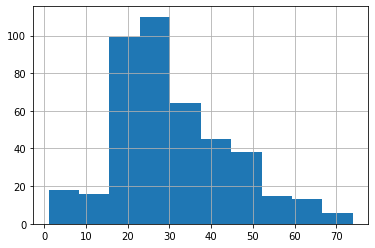

In [159]:
## You code here

sa = dataset[["Survived", "Age"]]
dead = sa[sa["Survived"] == 0]
survivors = sa[sa["Survived"] == 1]

dead["Age"].hist()
print("Mean age of dead people", dead["Age"].mean())

Mean age of survivors 28.343689655172415


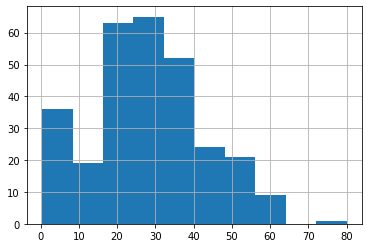

In [160]:
survivors["Age"].hist()
print("Mean age of survivors", survivors["Age"].mean())

# From the data we can see that a young people between the ages of 0-10 
# have better chances of survival than old people

---
**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). The main point here is to **choose** plots wisely and **make meaningful conclusions**



In [161]:
## You code here

---
**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

In [162]:
## You code here